In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import lena
from scipy.ndimage.filters import convolve
import scipy.ndimage as nd

# Q1 : 查詢rfft的定義後，想辦法得到下圖(low-pass filter)。

In [3]:
single_dot = np.zeros((101, 101))
single_dot[50, 50] = 1.0
gauss_kernel = nd.gaussian_filter(single_dot, 10)

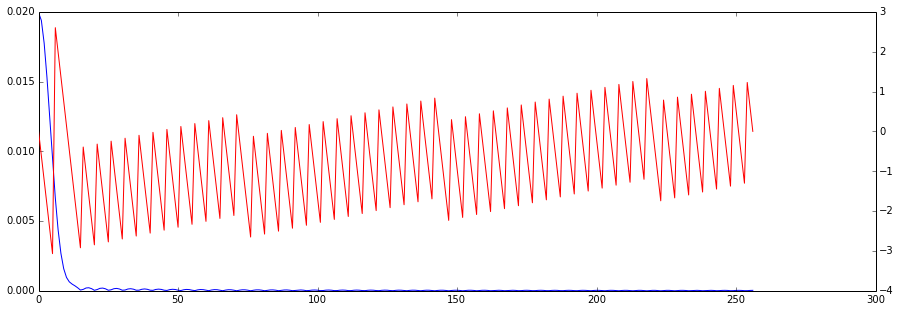

In [10]:
plt.figure(figsize=[15,5])
plt.plot(abs(np.fft.rfft(gauss_kernel[:, 50], n=512))) # only real part, so ~256
plt.twinx() # two y-axis

plt.plot(np.angle(np.fft.rfft(gauss_kernel[:, 50], n=512)), 'r')

# Q2 : 如何得到下面的結果?

In [8]:
src_image = lena()

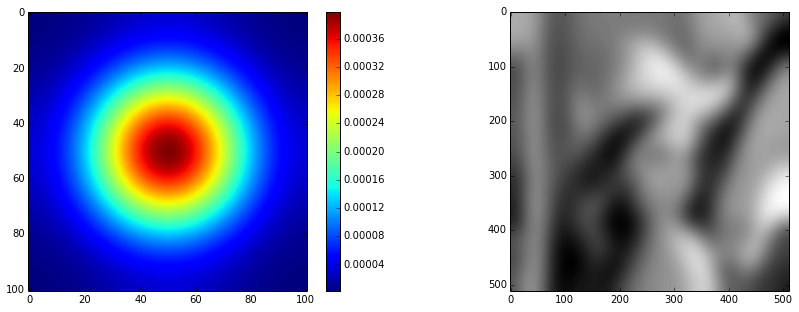

In [9]:
single_dot = np.zeros((101, 101))
single_dot[50, 50] = 1.0
gauss_kernel = nd.gaussian_filter(single_dot, 20)

plt.figure(figsize=[15,5])
plt.subplot(121)
plt.imshow(gauss_kernel)
plt.colorbar()

gauss_blur = convolve(src_image, gauss_kernel)
plt.subplot(122)
plt.imshow(gauss_blur, cmap=plt.cm.gray)

# Q3 : 查詢midian定義後，利用原影像呈現下圖。

In [11]:
def imshow2(image):
    plt.imshow(image, cmap=plt.cm.gray)

src_image_eyes = src_image[150:300, 100:400]

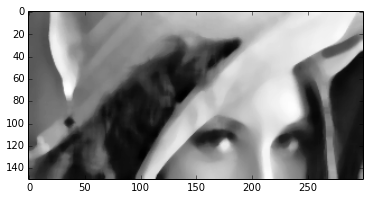

In [12]:
meye = nd.median_filter(src_image_eyes, size=10) # larger num more blur
imshow2(meye)

# Q4 : 利用gaussian filter來處理"雜訊影像"得到下面的結果。

In [13]:
noise = np.where(np.random.random(src_image_eyes.shape) > 0.9, 0.5, 0)
noisy_image = (src_image_eyes/255.0) + noise

<matplotlib.colorbar.Colorbar instance at 0x0E1A50A8>

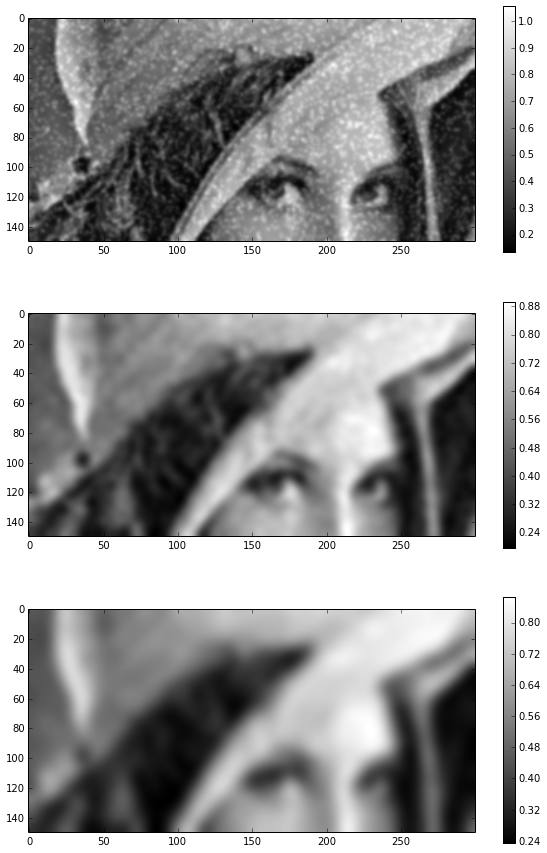

In [15]:
plt.figure(figsize=[10,15])
plt.subplot(311)
imshow2(nd.gaussian_filter(noisy_image, 1))
plt.colorbar()

plt.subplot(312)
imshow2(nd.gaussian_filter(noisy_image, 3))
plt.colorbar()

plt.subplot(313)
imshow2(nd.gaussian_filter(noisy_image, 5))
plt.colorbar()

# Q5 : 改使用median filter來處理"雜訊影像"得到下面的結果。

<matplotlib.colorbar.Colorbar instance at 0x0E9DCCD8>

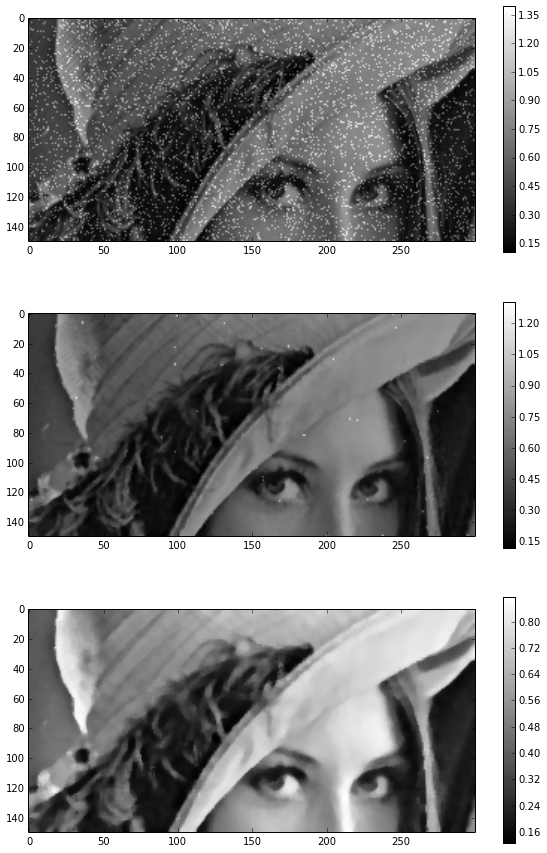

In [16]:
plt.figure(figsize=[10,15])
plt.subplot(311)
imshow2(nd.median_filter(noisy_image, 1))
plt.colorbar()

plt.subplot(312)
imshow2(nd.median_filter(noisy_image, 3))
plt.colorbar()

plt.subplot(313)
imshow2(nd.median_filter(noisy_image, 5))
plt.colorbar()